[u'bins', u'data']
dataset shape:
(20, 8, 512, 1024)
Print bins array:
[78625. 78159. 77500. 77256. 77594. 77626. 77524. 77587. 77119. 76750.
 77191. 76962. 76981. 76668. 77111. 76603. 76740. 76659. 76534. 75761.]
total number of shots = 1542950 
bins shape: 20
bins data type:
float64
avg xint = 0.659063
Low data spans bin range:
(1, 4)
length:  8
mean:    0.800892
median:  0.312620
minimum: 0.000000
maximum: 24.709178
st. dev: 1.852095
High data spans bin range:
(17, 20)
length:  8
mean:    0.793734
median:  0.312663
minimum: 0.000000
maximum: 26.046283
st. dev: 1.814389
shape of X:
(8, 512, 1024)
shape of Y:
(8, 512, 1024)
shape of q:
(8, 512, 1024)
max q value = 4.380191


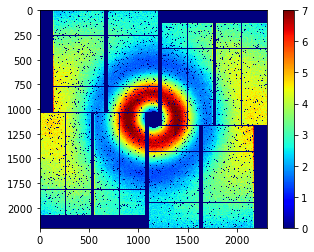

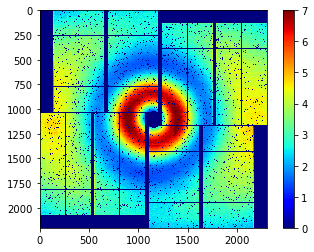

/cds/sw/ds/ana/conda1/inst/envs/ana-4.0.42/lib/python2.7/site-packages/ipykernel/__main__.py:121: RuntimeWarning: divide by zero encountered in divide
/cds/sw/ds/ana/conda1/inst/envs/ana-4.0.42/lib/python2.7/site-packages/ipykernel/__main__.py:121: RuntimeWarning: invalid value encountered in divide


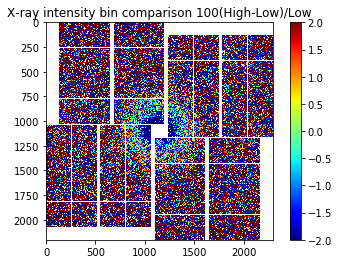

Averaging over 81 bins...
Averaging over 81 bins...
radial q counts:
[     0      0      0      0     21    777   2116   4171   6128   7648
   8820   9904  10939  12004  13097  14160  15191  16252  17362  18482
  19694  20897  22164  23433  24695  25767  26869  28307  29917  31495
  33081  34640  36269  38004  39643  40909  41712  42427  44086  46279
  48935  51463  53679  55536  55287  54586  57940  63465  67277  70823
  74294  77799  81596  85524  89562  93900  98217 102995 107698 112894
 118301 124693 131050 134863 136192 135153 133038 132538 126648 117330
 104692  90786  81584  72842  63749  54740  45650  36034  25626  14449
   3515]


/cds/sw/ds/ana/conda1/inst/envs/ana-4.0.42/lib/python2.7/site-packages/ipykernel/__main__.py:159: RuntimeWarning: invalid value encountered in divide


Text(0.5,1,'Radial average percent difference Ih(q) - Il(q)')

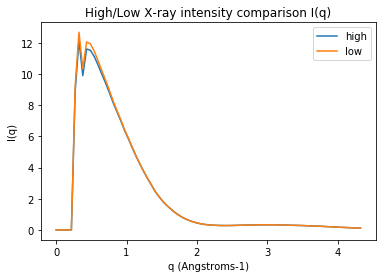

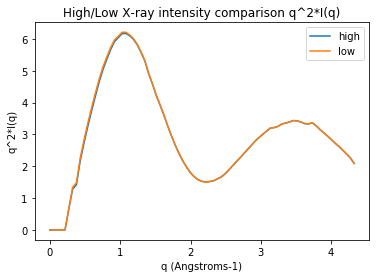

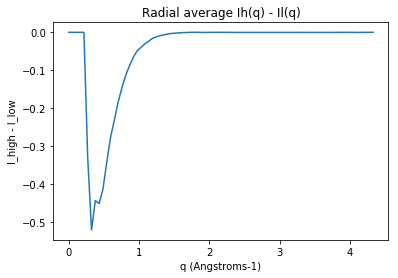

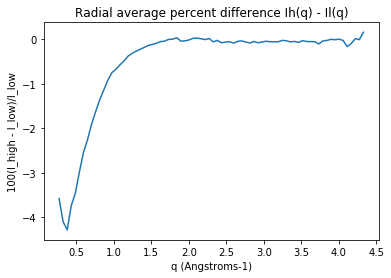

In [34]:
import numpy as np
import h5py
from psana import *
import matplotlib.pyplot as plt
from myfunctions import radial_avg,stats
from global_vars import *
#plt.switch_backend('agg')

### 5/5/22 (Day 4) TN
### Learning manipulation of h5 file data from SLAC (Nate)

"""
### From h5py:
An HDF5 file is a container for two kinds of objects: datasets, which are array-like collections of data, and groups, which are folder-like containers that hold datasets and other groups. The most fundamental thing to remember when using h5py is:

    Groups work like dictionaries, and datasets work like NumPy arrays

"""

# mask out bad pixels
mask = np.load('/reg/d/psdm/cxi/cxilv0418/results/Masks/Mask_Jungfrau_28_29_T_Edge.npy')

# load h5 file
fname = 'combined_runs_xint_binning.h5'
f = h5py.File(fname, 'r')

# print database keys
print(f.keys())

bins = f['bins']
dset = f['data']
print('dataset shape:')
print(dset.shape)

# The object we obtained isn’t an array, but an HDF5 dataset. Like NumPy arrays, datasets have both a shape and a data type:
#print(dset.shape)
#print(dset.dtype)
print('Print bins array:')
print(bins[:])
print('total number of shots = %d ' % np.sum(bins))
print('bins shape: %s' % bins.shape)
print('bins data type:')
print(bins.dtype)

# print some elements of the array
# print(dset[0])
# print(dset[:])
# ok...

print('avg xint = %f' % np.average(dset))

experiment = 'cxilv0418'
run = 43
ds = DataSource('exp=%s:run=%d'% (experiment, run))
evt0 = ds.events().next()
det = Detector('DetInfo(CxiDs1.0:Jungfrau.0)', ds.env())
# Bin statistics plot

scale = 1e5  # arbitrarily scale values for plotting
low_data=np.zeros((8,512,1024))
high_data=low_data

r0 = 1
r1 = 4
print('Low data spans bin range:')
print(r0, r1)
#print('bins:')
#print(bins[r])
#print('Sum of bins:')
#print(np.sum(bins[r]))
low_data = scale*mask*np.sum(dset[r0:r1,:,:,:],axis=0)/np.sum(bins[r0:r1])
stats(low_data)

r0 = 17
r1 = 20
print('High data spans bin range:')
print(r0, r1)
#print('bins:')
#print(bins[r])
high_data = scale*mask*np.sum(dset[r0:r1,:,:,:],axis=0)/np.sum(bins[r0:r1])
stats(high_data)

#Defining q and phi
x0, y0, Z, phi0 = 1.25458071e+03, 4.67530896e+02, 8.20468586e+04, 0 ##8.20468...
X = det.coords_x(evt0)
Y = det.coords_y(evt0)
print('shape of X:')
print(X.shape)
print('shape of Y:')
print(Y.shape)
distance = Z*1e-6
wavelength = 0.13051e-9
rr = np.sqrt((X+x0)**2 + (Y+y0)**2)*1e-6
theta = np.arctan2(rr, distance) / 2.0
q = 4*np.pi*np.sin(theta) / wavelength*1e-10
print('shape of q:')
print(q.shape)
print('max q value = %f' % np.max(q))
#phi = np.arctan2(Y+y0,X+x0) + np.pi

# Junfrau plots
plots=True
if plots:
 img0 = det.image(evt0, low_data*q**2)
 plt.figure()
 plt.imshow(img0, cmap='jet')
 plt.clim(0, 0.00007*scale)
 plt.colorbar()
 plt.title('')
 plt.show()
 
 img1 = det.image(evt0, high_data*q**2)
 plt.figure()
 plt.imshow(img1, cmap='jet')
 plt.clim(0, 0.00007*scale)
 plt.colorbar()
 plt.title('')
 plt.show()
 
 plt.figure()
 plt.imshow(100*(img1-img0)/img0, cmap='jet')
 #plt.clim(0, 5)
 plt.clim(-2, 2)
 plt.colorbar()
 plt.title('X-ray intensity bin comparison 100(High-Low)/Low')
 plt.show()
#######

nbins = 81
counts,q_rad,I_rad_high = radial_avg(q,high_data,nbins)
counts,q_rad,I_rad_low  = radial_avg(q,low_data,nbins)
print('radial q counts:')
print(counts)

#print(I_rad)
plt.figure()
plt.plot(q_rad,I_rad_high, label='high')
plt.plot(q_rad,I_rad_low, label='low')
plt.xlabel('q (Angstroms-1)')
plt.ylabel('I(q)')
plt.legend()
plt.title('High/Low X-ray intensity comparison I(q)')

plt.figure()
plt.plot(q_rad,I_rad_high*q_rad**2, label='high')
plt.plot(q_rad,I_rad_low*q_rad**2, label='low')
plt.xlabel('q (Angstroms-1)')
plt.ylabel('q^2*I(q)')
plt.legend()
plt.title('High/Low X-ray intensity comparison q^2*I(q)')

plt.figure()
plt.plot(q_rad,I_rad_high-I_rad_low)
plt.xlabel('q (Angstroms-1)')
plt.ylabel('I_high - I_low')
plt.title('Radial average Ih(q) - Il(q)')

plt.figure()
plt.plot(q_rad,100*(I_rad_high-I_rad_low)/I_rad_low)
plt.xlabel('q (Angstroms-1)')
plt.ylabel('100(I_high - I_low)/I_low')
plt.title('Radial average percent difference Ih(q) - Il(q)')

#plt.title('')
#plt.xlim(0.8,1.2)